In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


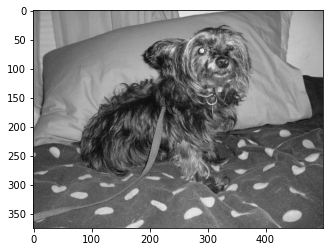

In [2]:
DATADIR = r'C:\AI program\2ndSemester\Numerical Methods\Deep Learning Neural Network\4th week_cats_dogs\datasets\PetImages'
CATEGORIES = ['Dog','Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap= 'gray')
        plt.show()
        break
    break

In [3]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [4]:
img_array.shape

(375, 500)

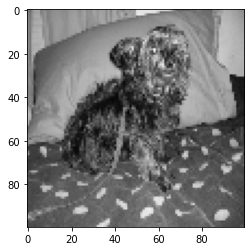

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [6]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

24946


In [7]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
1
1
0
0
0


In [8]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y = np.array(y)

In [9]:
pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in_X = open('X.pickle','rb')
pickle_in_y = open('y.pickle','rb')
X = pickle.load(pickle_in_X)
y = pickle.load(pickle_in_y)

In [11]:
X.shape

(24946, 100, 100, 1)

In [12]:
X = X/255.0 # normalize

model = Sequential()

# one lyer
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# two lyer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# three lyer
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(64))

# output lyer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, validation_split=0.3)

546/546 [==============================] - 247s 449ms/step - loss: 0.7271 - accuracy: 0.5459 - val_loss: 0.6496 - val_accuracy: 0.6252


In [19]:
def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction1 = model.predict([prepare('cat.jpg')])
prediction2 = model.predict([prepare('dog.jpg')])
print(CATEGORIES[int(prediction1[0][0])])
print(CATEGORIES[int(prediction2[0][0])])


Cat
Dog
